<a href="https://colab.research.google.com/github/PriyanshChaudhary/Classification_Clothing_using_CNN/blob/master/Clothing_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U tensorflow_datasets


     |████████████████████████████████| 686kB 9.8MB/s 


In [2]:
from __future__ import absolute_import, division, print_function

# Import TF & TF-datasets
import tensorflow as tf
import tensorflow_datasets as tfds
tf.logging.set_verbosity(tf.logging.ERROR)

# Helper Lbraries
import math
import numpy as np
import matplotlib.pyplot as plt

# Improve Progress Bar Display
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

# For version below TF 2.0
tf.enable_eager_execution()


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

1.13.1


In [3]:
#Downloading the data from the MNIST dataset
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/1.0.0. Subsequent calls will reuse this data.


In [0]:
# Mapping the numeric value to a human readable string
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [5]:
# Explore the Data

num_train_ex = metadata.splits['train'].num_examples
num_test_ex = metadata.splits['test'].num_examples
print("No. of Training examples: {}".format(num_train_ex))
print("No. of Testing examples: {}".format(num_test_ex))

No. of Training examples: 60000
No. of Testing examples: 10000


In [0]:
# Preprocess the data
# Normalizing pixel range from [0,255] to [0,1]

def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels 

# Map function applies normalization to each element in the train/test datasets

train_dataset = train_dataset.map(normalize)
test_dataset  = test_dataset.map(normalize)

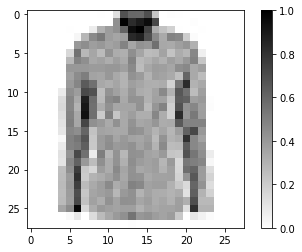

In [7]:
# Exploring the pre-processed data

for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

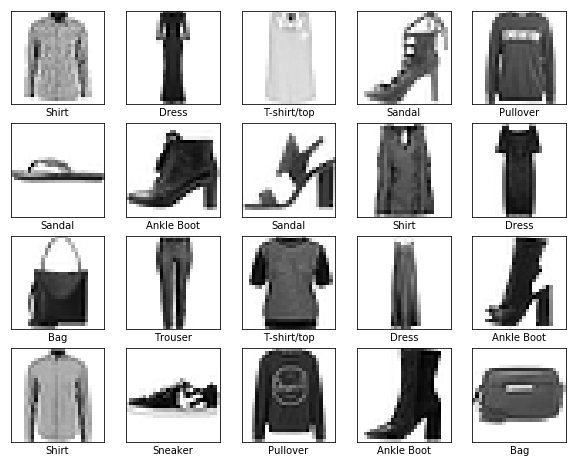

In [8]:
# Plotting images of fiest 25 examples
plt.figure(figsize = (10,10))
i = 0
for (image,label) in test_dataset.take(20):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap = plt.cm.binary)
  plt.xlabel(class_names[label])
  i +=1
plt.show()

In [0]:
# Setting up the layers & building the model

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activation = tf.nn.relu,
                          input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2), strides = 2),
    tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2), strides = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [0]:
model.compile(optimizer = 'adam',
             loss='sparse_categorical_crossentropy',#for calssification lossF(n)
              metrics = ['accuracy'])

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_ex).batch(BATCH_SIZE)
test_dataset  = test_dataset.batch(BATCH_SIZE)

In [13]:
model.fit(train_dataset, epochs = 10, steps_per_epoch = math.ceil(num_train_ex/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3933 - acc: 0.8569
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2564 - acc: 0.9062
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2079 - acc: 0.9240
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1772 - acc: 0.9348
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1518 - acc: 0.9433
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1288 - acc: 0.9528
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1084 - acc: 0.9595
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0919 - acc: 0.9665
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0770 - acc: 0.9712
Epoch 10/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0661 - acc: 0.9758



*  We increased the no. of epochs from 5 to 10.
*   The accuracy has increased from an 89% to ~98%.
*   This is helpful but later on we'll see it will decrease the total test accuracy.





In [14]:
#Evaluate accuracy on Test data

test_loss, test_accuracy = model.evaluate(test_dataset, steps = math.ceil(num_test_ex/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.3266 - acc: 0.9220
Accuracy on test dataset: 0.922


The accuracy on test dataset has decreased to 92 because:

-Due to the increase in no. of epochs, our model started over-fitting or memorizing the data.


In [0]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)
  
  

In [16]:
predictions.shape

(32, 10)

In [17]:
predictions[0]

array([4.5043196e-09, 5.1624868e-12, 2.2517647e-06, 1.9486608e-09,
       4.9963146e-01, 3.4263394e-09, 5.0036627e-01, 4.5180370e-12,
       4.3992303e-09, 5.9191868e-10], dtype=float32)

In [18]:
np.argmax(predictions[0])

6

In [19]:
test_labels[0]

6

In [0]:
def plot_image(i, pred_arr, true_labels, images):
  pred_arr, true_label, img = pred_arr[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[...,0],cmap = plt.cm.binary)
  
  pred_label = np.argmax(pred_arr)
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'
  
  plt.xlabel("{}{:2.0f}% ({})".format(class_names[pred_label],
                                     100*np.max(pred_arr),
                                     class_names[true_label]),
                                     color=color)
def plot_value_array(i, pred_arr, true_label):
  pred_arr, true_label = pred_arr[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), pred_arr, color = "#777777")
  plt.ylim([0,1])
  pred_label = np.argmax(pred_arr)
             
  thisplot[pred_label].set_color('red')
  thisplot[true_label].set_color('green')


             
             

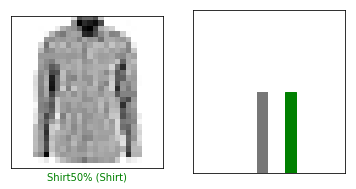

In [21]:
i =0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

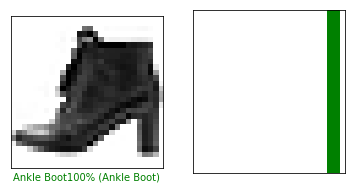

In [22]:
i =6
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

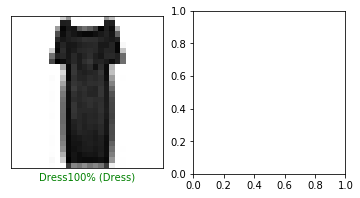

In [23]:
i =9
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)

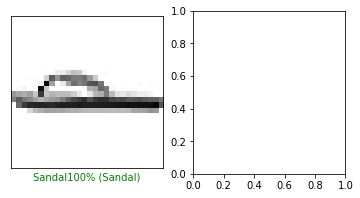

In [24]:
i =5
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)

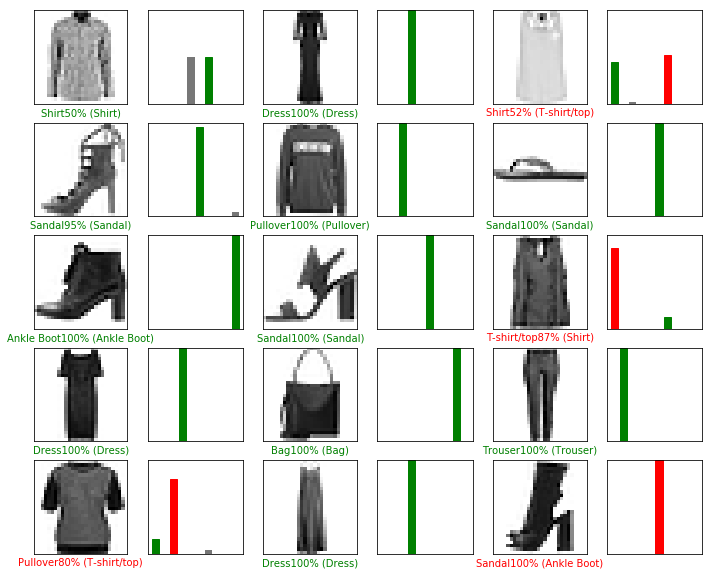

In [25]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_value_array(i, predictions, test_labels)